In [3]:
import nazca as nd

Starting layout export...
...gds generation
...Wrote file './RDL.gds'


/Users/harryxwh2003/opt/anaconda3/envs/NazcaEnv/lib/python3.13/site-packages/nazca/layout.py:489: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  self.layer2color[row[0]].append(dict(cfg.colors.iloc[i]))


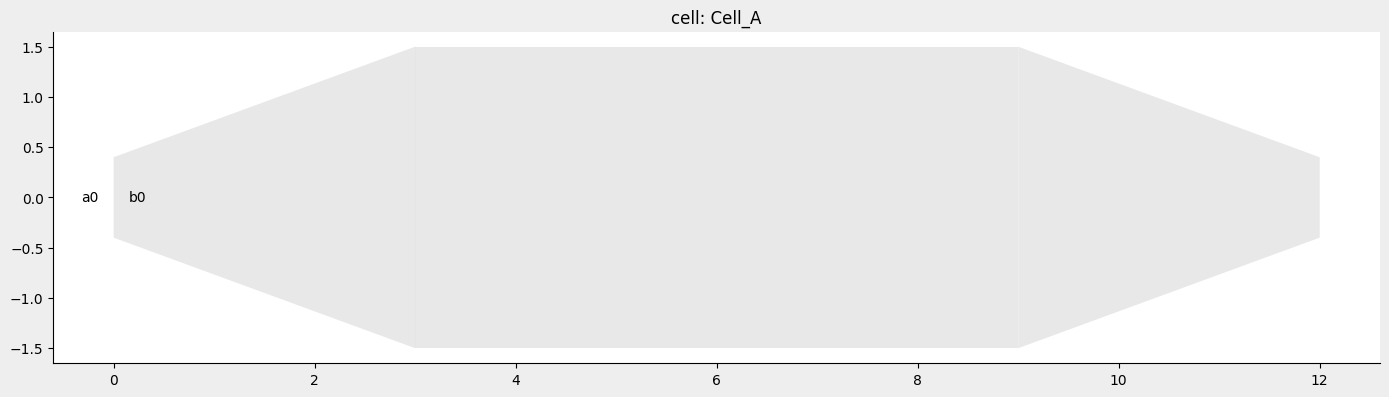

In [24]:
import nazca as nd

with nd.Cell(name='Cell_A') as cella:
    nd.taper(length=3, width1=0.8, width2=3).put()
    nd.strt(length=6,width=3).put()
    nd.taper(length=3, width1=3, width2=0.8).put()

nd.export_gds(cella,"RDL.gds")
nd.export_plt(cella)

In [16]:
# example created by Bright Photonics

print(cella.pin.keys())
# dict_keys(['org', 'a0', 'b0'])

for name, node in cella.pin.items():
    print(f"{name} @ {node.fxya()}")
# org @ (0.000, 0.000, 0.000)
# a0 @ (0.000, 0.000, 180.000)
# b0 @ (0.000, 0.000, 0.000)

dict_keys(['org', 'a0', 'b0'])
org @ (0.000, 0.000, 0.000)
a0 @ (0.000, 0.000, 180.000)
b0 @ (0.000, 0.000, 0.000)


Starting layout export...
...gds generation
...Wrote file './Upper.gds'


/Users/harryxwh2003/opt/anaconda3/envs/NazcaEnv/lib/python3.13/site-packages/nazca/layout.py:489: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  self.layer2color[row[0]].append(dict(cfg.colors.iloc[i]))


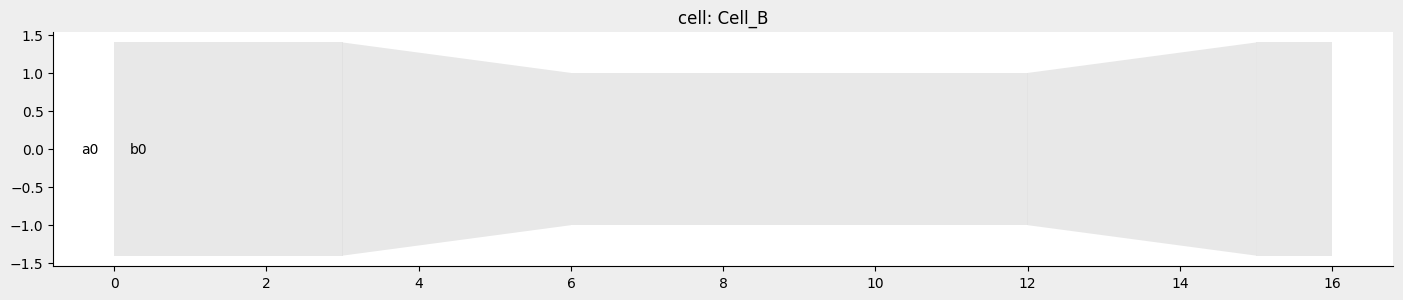

In [26]:
with nd.Cell(name='Cell_B') as cellb:
    nd.strt(length=3,width=2.8).put()
    nd.taper(length=3, width1=2.8, width2=2.0).put()
    nd.strt(length=6,width=2).put()
    nd.taper(length=3, width1=2.0, width2=2.8).put()
    nd.strt(length=1,width=2.8).put()

nd.export_gds(cellb,"Upper.gds")
nd.export_plt(cellb)

Starting layout export...
...gds generation
...Wrote file './Lower.gds'


/Users/harryxwh2003/opt/anaconda3/envs/NazcaEnv/lib/python3.13/site-packages/nazca/layout.py:489: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  self.layer2color[row[0]].append(dict(cfg.colors.iloc[i]))


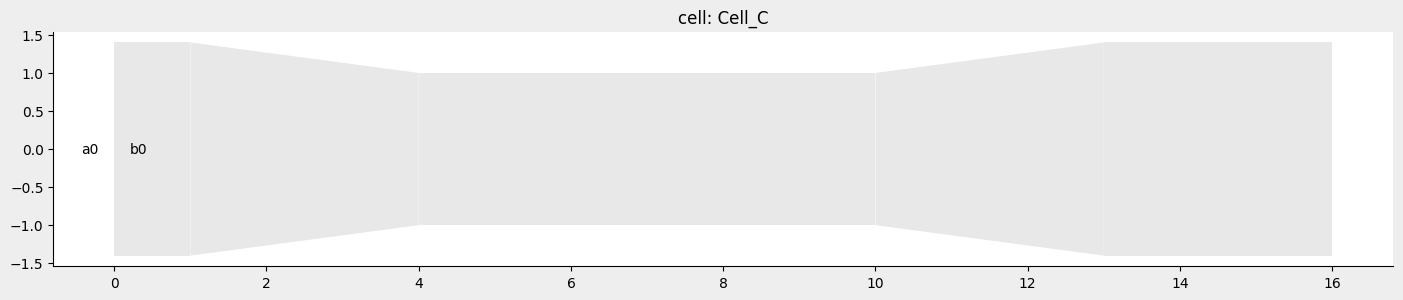

In [28]:
with nd.Cell(name='Cell_C') as cellc:
    nd.strt(length=1,width=2.8).put()
    nd.taper(length=3, width1=2.8, width2=2.0).put()
    nd.strt(length=6,width=2).put()
    nd.taper(length=3, width1=2.0, width2=2.8).put()
    nd.strt(length=3,width=2.8).put()

nd.export_gds(cellc,"Lower.gds")
nd.export_plt(cellc)